In [2]:
import numpy as np
import pandas as pd
from pandas import DataFrame,Series
import matplotlib.pyplot as plt
#CDNOW_master.txt

## 第一部分：数据类型处理
  - 数据加载
      - 字段含义：
          - user_id:用户ID
          - order_dt:购买日期
          - order_product:购买产品的数量
          - order_amount:购买金额
  - 观察数据
       - 查看数据的数据类型
       - 数据中是否存储在缺失值
       - 将order_dt转换成时间类型
       - 查看数据的统计描述
           - 计算所有用户购买商品的平均数量
           - 计算所有用户购买商品的平均花费
       - 在源数据中添加一列表示月份:astype('datatime64[M]')

In [3]:
df = pd.read_csv('./B站学习数据/CDNOW_master.txt',header=None,sep='\s+',names=['user_id','order_dt','order_product','order_amount'])
df

,user_id,order_dt,order_product,order_amount
0,1,19970101,1,11.77
1,2,19970112,1,12.00
2,2,19970112,5,77.00
3,3,19970102,2,20.76
4,3,19970330,2,20.76
...,...,...,...,...
69654,23568,19970405,4,83.74
69655,23568,19970422,1,14.99
69656,23569,19970325,2,25.74
69657,23570,19970325,3,51.12


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        69659 non-null  int64  
 1   order_dt       69659 non-null  int64  
 2   order_product  69659 non-null  int64  
 3   order_amount   69659 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 2.1 MB


In [5]:
df['order_dt'] = pd.to_datetime(df['order_dt'],format='%Y%m%d')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   user_id        69659 non-null  int64         
 1   order_dt       69659 non-null  datetime64[ns]
 2   order_product  69659 non-null  int64         
 3   order_amount   69659 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 2.1 MB


In [7]:
#查看数据的统计描述
df.describe()

,user_id,order_product,order_amount
count,69659.000000,69659.000000,69659.000000
mean,11470.854592,2.410040,35.893648
std,6819.904848,2.333924,36.281942
min,1.000000,1.000000,0.000000
25%,5506.000000,1.000000,14.490000
50%,11410.000000,2.000000,25.980000
75%,17273.000000,3.000000,43.700000
max,23570.000000,99.000000,1286.010000


In [8]:
#基于order_dt取出期中的月份
df['order_dt'].astype('datetime64[M]')

0       1997-01-01
1       1997-01-01
2       1997-01-01
3       1997-01-01
4       1997-03-01
           ...    
69654   1997-04-01
69655   1997-04-01
69656   1997-03-01
69657   1997-03-01
69658   1997-03-01
Name: order_dt, Length: 69659, dtype: datetime64[ns]

In [9]:
#在源数据中添加一列表示月份:astype('datatime64[M]')
df['month'] = df['order_dt'].astype('datetime64[M]')
df

,user_id,order_dt,order_product,order_amount,month
0,1,1997-01-01,1,11.77,1997-01-01
1,2,1997-01-12,1,12.00,1997-01-01
2,2,1997-01-12,5,77.00,1997-01-01
3,3,1997-01-02,2,20.76,1997-01-01
4,3,1997-03-30,2,20.76,1997-03-01
...,...,...,...,...,...
69654,23568,1997-04-05,4,83.74,1997-04-01
69655,23568,1997-04-22,1,14.99,1997-04-01
69656,23569,1997-03-25,2,25.74,1997-03-01
69657,23570,1997-03-25,3,51.12,1997-03-01


## 第二部分：按月数据分析
  - 用户每月花费的总金额
      - 绘制曲线图展示
  - 所有用户每月的产品购买量
  - 所有用户每月的消费总次数
  - 统计每月的消费人数

In [11]:
#用户每月花费的总金额
df.groupby(by='month')['order_amount'].sum()

month
1997-01-01    299060.17
1997-02-01    379590.03
1997-03-01    393155.27
1997-04-01    142824.49
1997-05-01    107933.30
1997-06-01    108395.87
1997-07-01    122078.88
1997-08-01     88367.69
1997-09-01     81948.80
1997-10-01     89780.77
1997-11-01    115448.64
1997-12-01     95577.35
1998-01-01     76756.78
1998-02-01     77096.96
1998-03-01    108970.15
1998-04-01     66231.52
1998-05-01     70989.66
1998-06-01     76109.30
Name: order_amount, dtype: float64

<AxesSubplot:xlabel='month'>

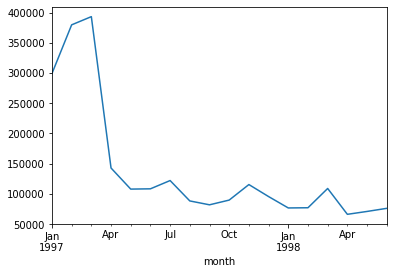

In [13]:
df.groupby(by='month')['order_amount'].sum().plot()

<AxesSubplot:xlabel='month'>

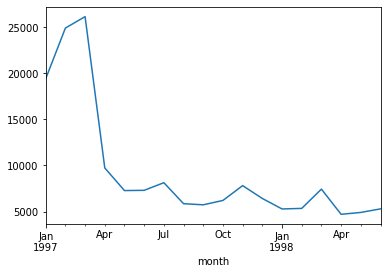

In [15]:
#所有用户每月的产品购买量
df.groupby(by='month')['order_product'].sum().plot()

In [19]:
#所有用户每月的消费总次数
df.groupby(by='month')['user_id'].count()

month
1997-01-01     8928
1997-02-01    11272
1997-03-01    11598
1997-04-01     3781
1997-05-01     2895
1997-06-01     3054
1997-07-01     2942
1997-08-01     2320
1997-09-01     2296
1997-10-01     2562
1997-11-01     2750
1997-12-01     2504
1998-01-01     2032
1998-02-01     2026
1998-03-01     2793
1998-04-01     1878
1998-05-01     1985
1998-06-01     2043
Name: user_id, dtype: int64

In [26]:
#统计每月的消费人数(可能同一天一个用户会消费多次) nunique表示统计去重后的个数
df.groupby(by='month')['user_id'].nunique()

month
1997-01-01    7846
1997-02-01    9633
1997-03-01    9524
1997-04-01    2822
1997-05-01    2214
1997-06-01    2339
1997-07-01    2180
1997-08-01    1772
1997-09-01    1739
1997-10-01    1839
1997-11-01    2028
1997-12-01    1864
1998-01-01    1537
1998-02-01    1551
1998-03-01    2060
1998-04-01    1437
1998-05-01    1488
1998-06-01    1506
Name: user_id, dtype: int64

## 第三部分：用户个体消费数据分析
  - 用户消费总金额和消费总次数的统计描述
  - 用户消费金额和消费次数的散点图
  - 各个用户消费总金额的直方图（消费金额在1000之内的分布）
  - 各个用户消费总数量的直方图（消费商品的数量在100次之内的分布）

In [28]:
#用户消费总金额和消费总次数的统计描述
df.groupby(by='user_id')['order_amount'].sum() #每一个用户消费的总金额

user_id
1         11.77
2         89.00
3        156.46
4        100.50
5        385.61
          ...  
23566     36.00
23567     20.97
23568    121.70
23569     25.74
23570     94.08
Name: order_amount, Length: 23570, dtype: float64

In [32]:
#每一个用户消费的总次数
df.groupby(by='user_id').count()['order_dt']

user_id
1         1
2         2
3         6
4         4
5        11
         ..
23566     1
23567     1
23568     3
23569     1
23570     2
Name: order_dt, Length: 23570, dtype: int64

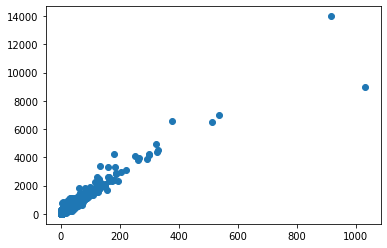

In [36]:
#用户消费金额和消费次数的散点图
user_amount_sum = df.groupby(by='user_id')['order_amount'].sum()
user_product_sum = df.groupby(by='user_id')['order_product'].sum()
plt.scatter(user_product_sum,user_amount_sum)

<AxesSubplot:>

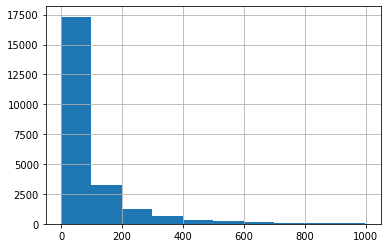

In [41]:
#各个用户消费总金额的直方图（消费金额在1000之内的分布）
df.groupby(by='user_id').sum().query('order_amount <= 1000')['order_amount']
df.groupby(by='user_id').sum().query('order_amount <= 1000')['order_amount'].hist()

<AxesSubplot:>

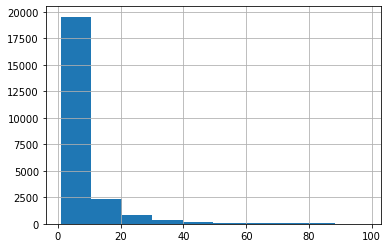

In [43]:
#各个用户消费总数量的直方图（消费商品的数量在100次之内的分布）
df.groupby(by='user_id').sum().query('order_product <= 100')['order_product'].hist()

### 第四部分：用户消费行为分析
- 用户第一次消费的月份分布，和人数统计
    - 绘制线形图
- 用户最后一次消费的时间分布，和人数统计
    - 绘制线形图
- 新老客户的占比
    - 消费一次为新用户
    - 消费多次为老用户
        - 分析出每一个用户的第一个消费和最后一次消费的时间
            - agg(['func1','func2']):对分组后的结果进行指定聚合
        - 分析出新老客户的消费比例
- 用户分层
    - 分析得出每个用户的总购买量和总消费金额and最近一次消费的时间的表格rfm
    - RFM模型设计
        - R表示客户最近一次交易时间的间隔。
            - /np.timedelta64(1,'D')：去除days
        - F表示客户购买商品的总数量,F值越大，表示客户交易越频繁，反之则表示客户交易不够活跃。
        - M表示客户交易的金额。M值越大，表示客户价值越高，反之则表示客户价值越低。
        - 将R，F，M作用到rfm表中
    - 根据价值分层，将用户分为：
        - 重要价值客户
        - 重要保持客户
        - 重要挽留客户
        - 重要发展客户
        - 一般价值客户
        - 一般保持客户
        - 一般挽留客户
        - 一般发展客户
            - 使用已有的分层模型即可rfm_func

### 第五部分：用户的生命周期
- 将用户划分为活跃用户和其他用户
    - 统计每个用户每个月的消费次数
    - 统计每个用户每个月是否消费，消费记录为1否则记录为0
        - 知识点：DataFrame的apply和applymap的区别
            - applymap:返回df
            - 将函数做用于DataFrame中的所有元素(elements)
            - apply:返回Series
            - apply()将一个函数作用于DataFrame中的每个行或者列
    - 将用户按照每一个月份分成：
        - unreg:观望用户（前两月没买，第三个月才第一次买,则用户前两个月为观望用户）
        - unactive:首月购买后，后序月份没有购买则在没有购买的月份中该用户的为非活跃用户
        - new:当前月就进行首次购买的用户在当前月为新用户
        - active:连续月份购买的用户在这些月中为活跃用户
        - return:购买之后间隔n月再次购买的第一个月份为该月份的回头客